In [1]:
import warnings
warnings.filterwarnings("ignore")

### Import libraries

In [27]:
import numpy as np
import pandas as pd
from sklearn import neighbors, tree, linear_model
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, KFold
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import lightgbm as ltb
from xgboost import XGBRegressor, DMatrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor


### Libraries for visualization
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

##### Part 1
##### Build numeric prediction models that predict Spending based on the other available customer information 
##### (obviously, not including the Purchase attribute among the inputs!). Use linear regression, k-NN, 
##### regression tree, SVM regreesion and Neural Network and ensembling models. Briefly discuss your 
##### explorations and present the best result (best predictive model) for each of these techniques. 
##### Compare the techniques; which of them provides the best predictive performance? Please make sure you 
##### use best practices for predictive modeling. (I.e., do you need to set which hyper-parameter? Normalize?)

### Import dataset

In [5]:
df=pd.read_excel('mailing_purchases.xlsx')
df.head()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,127.87
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0.00
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127.48
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0.00
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0.00


### Data exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sequence_number       2000 non-null   int64  
 1   US                    2000 non-null   int64  
 2   source_a              2000 non-null   int64  
 3   source_c              2000 non-null   int64  
 4   source_b              2000 non-null   int64  
 5   source_d              2000 non-null   int64  
 6   source_e              2000 non-null   int64  
 7   source_m              2000 non-null   int64  
 8   source_o              2000 non-null   int64  
 9   source_h              2000 non-null   int64  
 10  source_r              2000 non-null   int64  
 11  source_s              2000 non-null   int64  
 12  source_t              2000 non-null   int64  
 13  source_u              2000 non-null   int64  
 14  source_p              2000 non-null   int64  
 15  source_x             

In [7]:
df.describe()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,0.824500,0.126500,0.056000,0.060000,0.041500,0.151000,0.01650,0.033500,0.052500,...,0.018000,0.137500,1.417000,2155.101000,2435.601500,0.426000,0.524500,0.221000,0.500000,102.560745
std,577.494589,0.380489,0.332495,0.229979,0.237546,0.199493,0.358138,0.12742,0.179983,0.223089,...,0.132984,0.344461,1.405738,1141.302846,1077.872233,0.494617,0.499524,0.415024,0.500125,186.749816
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1133.000000,1671.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1000.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2280.000000,2721.000000,0.000000,1.000000,0.000000,0.500000,1.855000
75%,1500.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,2.000000,3139.250000,3353.000000,1.000000,1.000000,0.000000,1.000000,152.532500
max,2000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,15.000000,4188.000000,4188.000000,1.000000,1.000000,1.000000,1.000000,1500.060000


In [8]:
### Checking for nulls
df.isnull().sum()

sequence_number         0
US                      0
source_a                0
source_c                0
source_b                0
source_d                0
source_e                0
source_m                0
source_o                0
source_h                0
source_r                0
source_s                0
source_t                0
source_u                0
source_p                0
source_x                0
source_w                0
Freq                    0
last_update_days_ago    0
1st_update_days_ago     0
Web order               0
Gender=male             0
Address_is_res          0
Purchase                0
Spending                0
dtype: int64

## checking correlation

<AxesSubplot:>

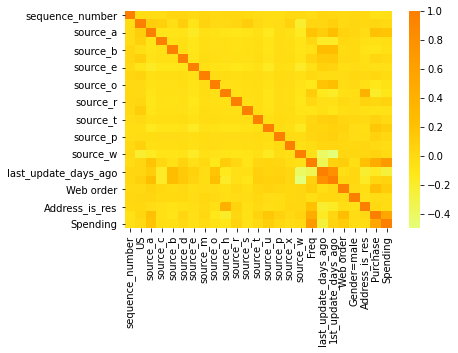

In [9]:
# correlation plot
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= False)

## No significantly high correlation is shown between the variables, so all variables are considered
## 3 variables showing higher correlation with 'Spending' are 'Freq','Address_is_res' and 'Purchase'

## Checking distributions

Text(0.5, 1.0, 'Distribution of 1st_update_days_ago')

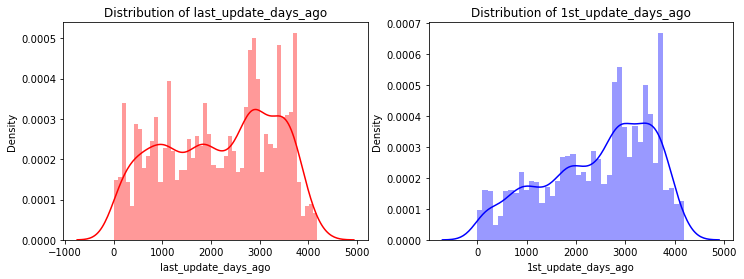

In [10]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['last_update_days_ago'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of last_update_days_ago')

ax=f.add_subplot(122)
sns.distplot(df['1st_update_days_ago'],bins=40,color='b',ax=ax)
ax.set_title('Distribution of 1st_update_days_ago')


Text(0.5, 1.0, 'Distribution of Freq')

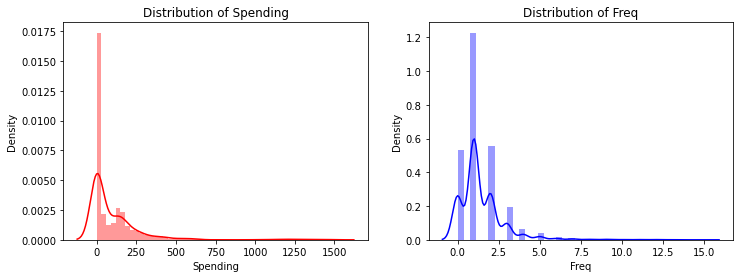

In [11]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['Spending'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of Spending')

ax=f.add_subplot(122)
sns.distplot(df['Freq'],bins=40,color='b',ax=ax)
ax.set_title('Distribution of Freq')


In [12]:
## Output variable spending is highly skewed

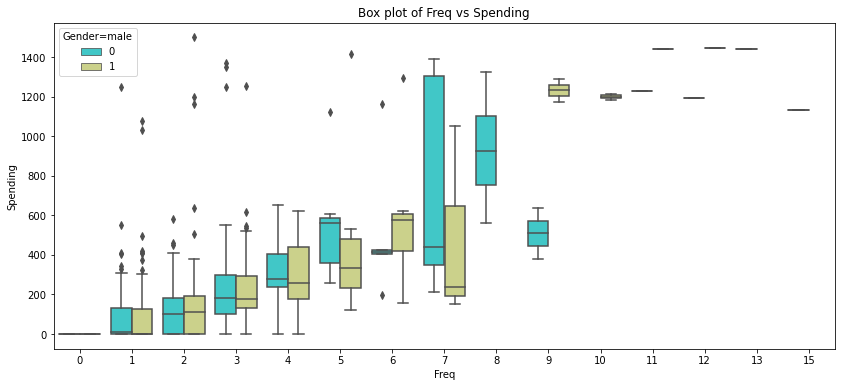

In [13]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Freq', y='Spending',hue='Gender=male',data=df,palette='rainbow')
plt.title('Box plot of Freq vs Spending');

### most purchases are made by males in the frequency number of 7 and 8. Women also show similar pattern
### but numbers are considerably lower than men

Text(0.5, 1.0, 'Scatter plot of 1st_update_days_ago vs Spending')

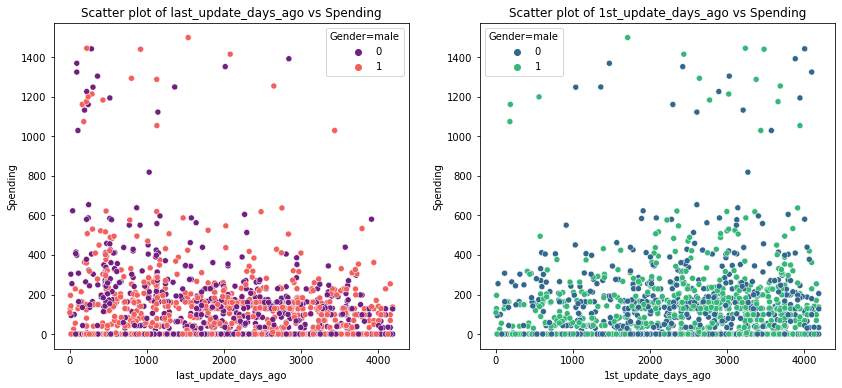

In [14]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='last_update_days_ago',y='Spending',data=df,palette='magma',hue='Gender=male',ax=ax)
ax.set_title('Scatter plot of last_update_days_ago vs Spending')

ax = f.add_subplot(122)
sns.scatterplot(x='1st_update_days_ago',y='Spending',data=df,palette='viridis',hue='Gender=male')
ax.set_title('Scatter plot of 1st_update_days_ago vs Spending')

#### For regression: regularization should be done. And for that normalization needs to be done

In [15]:
#create a dataframe with training data columns last_update_days_ago & first_update_days_ago
y=df['Spending'].values
X = df.drop(columns=['sequence_number','Purchase','Spending'])
#check that the target variable has been removed
display(X.head())

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_u,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,2,3662,3662,1,0,1
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,2900,2900,1,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,3883,3914,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,829,829,0,1,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,869,869,0,0,0


In [16]:
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [17]:
### Scaling the dataset
scaler = MinMaxScaler()
# transform data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
print(X_train_scaled.shape, X_test_scaled.shape)

(1600, 22) (400, 22)


# Running Models

## Comparison between models

In [18]:
# user variables to tune
folds   = 10
seed = 9
metric  = "neg_mean_squared_error"


# hold different regression models in a single dictionary
models = {}
models["Linear"]        = LinearRegression()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["RandomForest"]  = RandomForestRegressor()
models["XGBoostRegressor"] = XGBRegressor()
models['LightGBMRegressor'] = ltb.LGBMRegressor()

# 10-fold cross validation for each model
model_results = []
model_names   = []
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, random_state=seed, shuffle = True)
    results = cross_val_score(model, X_train_scaled, y_train, cv=k_fold, scoring=metric)
    
    model_results.append(results)
    model_names.append(model_name)
    print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))


Linear: -13577.155, 4780.776
KNN: -23863.613, 7127.598
DecisionTree: -23128.251, 7981.292
SVR: -34755.588, 10658.837
RandomForest: -14234.76, 4645.858
XGBoostRegressor: -15127.913, 5199.108
LightGBMRegressor: -14490.441, 4209.202


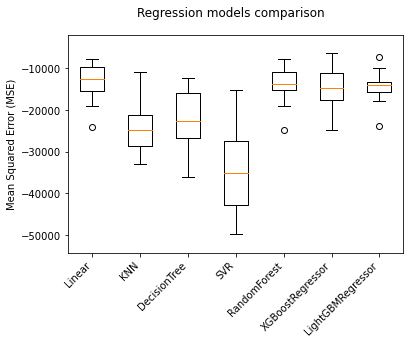

In [19]:
# box-whisker plot to compare regression models
figure = plt.figure()
figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Mean Squared Error (MSE)")
plt.margins(0.05, 0.1)

## Linear Regression

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled,y_train)

LinearRegression()

In [21]:
print(lin_reg.intercept_)

4.886849126565593


In [22]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
US,-1.641248
source_a,36.140547
source_c,-40.825885
source_b,-4.259935
source_d,-15.237693
...,...
last_update_days_ago,-77.355382
1st_update_days_ago,41.307190
Web order,15.014437
Gender=male,-10.493470


### Making Predictions

In [23]:
y_pred = lin_reg.predict(X_test_scaled)

In [24]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(10)

,Actual,Predicted
0,0.06,35.966326
1,184.00,245.788685
2,0.07,104.363602
3,1288.54,1025.826454
4,0.00,-10.871760
5,0.06,33.805827
6,0.07,68.822712
7,1255.00,328.060202
8,0.07,86.059997
9,0.07,105.288868


In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R_square_Sk=lin_reg.score(X_test_scaled, y_test)
print('R square obtain for scikit learn library is :',R_square_Sk)

Mean Absolute Error: 97.83356729753774
Mean Squared Error: 27254.201104358
Root Mean Squared Error: 165.08846447998116
R square obtain for scikit learn library is : 0.47562365688717234


Text(0.5, 1.0, 'Check for Linearity:\n Actual Vs Predicted value for Linear Regressor')

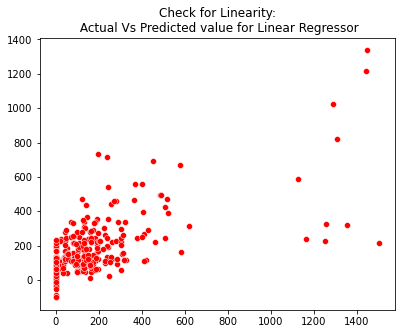

In [26]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value for Linear Regressor')

## Implementing nested CV on KNN Regressor

In [27]:
### Initializing grid for identifying best paramters
grid_params_knn= {'n_neighbors':range(5,20),
                  'weights':['uniform','distance'],
                  'metric':['euclidean','manhattan','minkowski']}
# KNN Classifier
model = KNeighborsRegressor()
NUM_TRIALS= 10
# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)
metric  = "neg_mean_squared_error"
folds=3

# Loop for each trial
for i in range(NUM_TRIALS):

    inner_cv = KFold(n_splits=folds, random_state=i, shuffle = True)
    outer_cv = KFold(n_splits=folds, random_state=i, shuffle = True)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=model, param_grid=grid_params_knn, cv=inner_cv, scoring=metric)
    clf.fit(X_train_scaled, y_train)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X_train_scaled, y=y_train, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

In [28]:
### Model performance
score_difference = non_nested_scores - nested_scores
print(clf.best_params_)
print("Average non_nested_scores {0:6f} and average nested_scores {1:6f}."
      .format(non_nested_scores.mean(), nested_scores.mean()))
print("Average difference of {0:6f} with std. dev. of {1:6f}."
      .format(score_difference.mean(), score_difference.std()))

{'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}
Average non_nested_scores -23982.683079 and average nested_scores -24625.590625.
Average difference of 642.907546 with std. dev. of 304.541465.


### Training the KNN Regressor with grid based parameters and generating evaluation metrics

In [29]:
### Training the model based on hyperparameter tuning by grid search
reg_knn = KNeighborsRegressor(metric=clf.best_params_['metric'], 
              n_neighbors= clf.best_params_['n_neighbors'], 
              weights=clf.best_params_['weights'])
### using standardized data because using regularization
reg_knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=8, weights='distance')

### Making Predictions

In [30]:
y_pred_knn = reg_knn.predict(X_test_scaled)

In [31]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})
df.head(10)

,Actual,Predicted
0,0.06,0.060000
1,184.00,241.337533
2,0.07,17.504504
3,1288.54,403.768171
4,0.00,109.828976
5,0.06,0.060000
6,0.07,3.392738
7,1255.00,172.554432
8,0.07,0.000000
9,0.07,106.014507


In [32]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_knn))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_knn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))
R_square_knn=reg_knn.score(X_test_scaled, y_test)
print('R square obtained for KNN regressor is :',R_square_knn)

Mean Absolute Error: 103.0712647142588
Mean Squared Error: 45154.409270223856
Root Mean Squared Error: 212.495668826976
R square obtained for KNN regressor is : 0.1312200303404304


Text(0.5, 1.0, 'Check for Linearity:\n Actual Vs Predicted value for KNN Regressor')

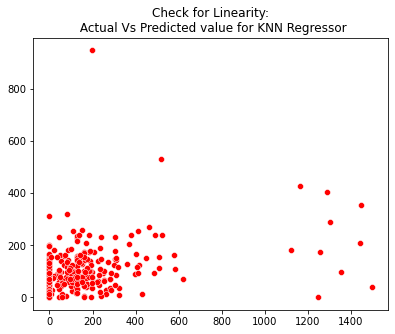

In [33]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_knn,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value for KNN Regressor')

### Implementing nested CV on Decision Tree Regressor

In [34]:
### Initializing grid for identifying best paramters
grid_params_dt= {'max_depth':range(2,5), 
                  'min_samples_leaf':range(1,5),
                  'min_samples_split':range(1,10)}
# KNN Classifier
model = DecisionTreeRegressor()
NUM_TRIALS= 10
# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)
metric  = "neg_mean_squared_error"
folds=3

# Loop for each trial
for i in range(NUM_TRIALS):

    inner_cv = KFold(n_splits=folds, random_state=i, shuffle = True)
    outer_cv = KFold(n_splits=folds, random_state=i, shuffle = True)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=model, param_grid=grid_params_dt, cv=inner_cv, scoring=metric)
    clf.fit(X_train_scaled, y_train)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X_train_scaled, y=y_train, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

In [35]:
### Model performance
score_difference = non_nested_scores - nested_scores
print(clf.best_params_)
print("Average non_nested_scores {0:6f} and average nested_scores {1:6f}."
      .format(non_nested_scores.mean(), nested_scores.mean()))
print("Average difference of {0:6f} with std. dev. of {1:6f}."
      .format(score_difference.mean(), score_difference.std()))

{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 9}
Average non_nested_scores -15946.630888 and average nested_scores -16912.720245.
Average difference of 966.089357 with std. dev. of 756.535917.


### Training the Decision Tree Regressor with grid based parameters and generating evaluation metrics

In [36]:
### Training the model based on hyperparameter tuning by grid search
reg_dt = DecisionTreeRegressor(max_depth=clf.best_params_['max_depth'], 
              min_samples_leaf= clf.best_params_['min_samples_leaf'], 
              min_samples_split=clf.best_params_['min_samples_split'])
### using standardized data because using regularization
reg_dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=4, min_samples_split=9)

### Making Predictions

In [37]:
y_pred_dt = reg_dt.predict(X_test_scaled)

In [38]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dt})
df.head(10)

,Actual,Predicted
0,0.06,113.493982
1,184.00,113.493982
2,0.07,64.481369
3,1288.54,1232.670000
4,0.00,0.000000
5,0.06,113.493982
6,0.07,64.481369
7,1255.00,190.771685
8,0.07,64.481369
9,0.07,64.481369


In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_dt))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_dt))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)))
R_square_dt=reg_dt.score(X_test_scaled, y_test)
print('R square obtained for Decision Tree regressor is :',R_square_dt)

Mean Absolute Error: 93.6373076600851
Mean Squared Error: 32241.23994262394
Root Mean Squared Error: 179.55845828761156
R square obtained for Decision Tree regressor is : 0.37967202069874695


Text(0.5, 1.0, 'Check for Linearity:\n Actual Vs Predicted value for Decision Tree Regressor')

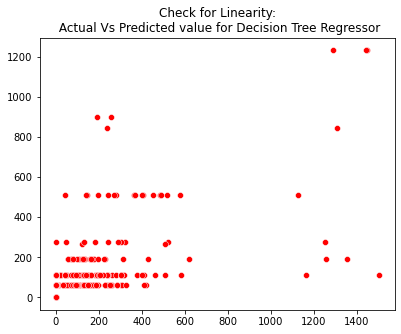

In [40]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_dt,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value for Decision Tree Regressor')

### SVR 

In [41]:
# Set up possible values of parameters to optimize over
p_grid = [{'kernel': ['rbf','poly'], 
           'gamma': [1e-3, 0.5, 1, 10],
           'C': [0.01, 0.1, 1]}]
# Support Vector Classifier
model = SVR()
NUM_TRIALS= 5
# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)
folds=3
metric  = "neg_mean_squared_error"

# Loop for each trial
for i in range(NUM_TRIALS):

    inner_cv = KFold(n_splits=folds, random_state=i, shuffle = True)
    outer_cv = KFold(n_splits=folds, random_state=i, shuffle = True)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=model, param_grid=p_grid, cv=inner_cv, scoring=metric)
    clf.fit(X_train_scaled, y_train)
    
    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X_train_scaled, y=y_train, cv=outer_cv)
    nested_scores[i] = nested_score.mean()
    print(i)

0
1
2
3
4


In [42]:
### Model performance
print(clf.best_params_)
print("Average nested_scores {0:6f}.".format(nested_scores.mean()))

{'C': 0.1, 'gamma': 10, 'kernel': 'poly'}
Average nested_scores -16048.843150.


In [43]:
### Training the model based on hyperparameter tuning by grid search
reg_svm = SVR(C=clf.best_params_['C'],
              gamma= clf.best_params_['gamma'],
              kernel= clf.best_params_['kernel'],)
### using standardized data because using regularization
reg_svm.fit(X_train_scaled, y_train)

### Fitting the model on the test data
y_test_svr=reg_svm.predict(X_test_scaled) 

In [44]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_svr})
df.head(10)

,Actual,Predicted
0,0.06,-0.420013
1,184.00,304.094205
2,0.07,65.031540
3,1288.54,1512.865450
4,0.00,43.374763
5,0.06,-0.170432
6,0.07,24.514529
7,1255.00,163.118144
8,0.07,23.482741
9,0.07,42.294911


In [45]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_svr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_svr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_svr)))
R_square_svm=reg_svm.score(X_test_scaled, y_test)
print('R square obtained for support vector regressor is :',R_square_svm)

Mean Absolute Error: 89.15520684059909
Mean Squared Error: 33343.75477061447
Root Mean Squared Error: 182.6027238860759
R square obtained for support vector regressor is : 0.35845941235570156


Text(0.5, 1.0, 'Check for Linearity:\n Actual Vs Predicted value for Support Vector Regressor')

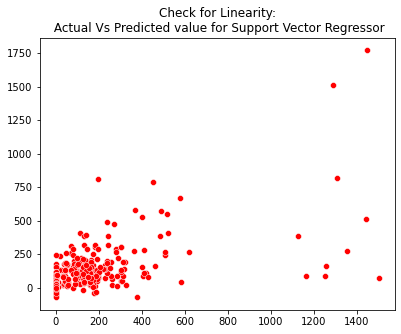

In [46]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_test_svr,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value for Support Vector Regressor')

### Bayesian Optimization for XGBoost Regressor

In [3]:
from xgboost import XGBRegressor, DMatrix
from sklearn.metrics import make_scorer
from functools import partial
from sklearn.model_selection import KFold, StratifiedKFold
from skopt.space import Real, Categorical, Integer
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, DeltaYStopper
from time import time

In [48]:
# Reporting util for different optimizers
def report_perf(optimizer, X, y, title="model", callbacks=None):
    """
    A wrapper for measuring time and performances of different optmizers
    
    optimizer = a sklearn or a skopt optimizer
    X = the training set 
    y = our target
    title = a string label for the experiment
    """
    start = time()
    
    if callbacks is not None:
        optimizer.fit(X, y, callback=callbacks)
    else:
        optimizer.fit(X, y)
        
    d=pd.DataFrame(optimizer.cv_results_)
    best_score = optimizer.best_score_
    best_score_std = d.iloc[optimizer.best_index_].std_test_score
    best_params = optimizer.best_params_
    
    print((title + " took %.2f seconds,  candidates checked: %d, best CV score: %.3f "
           + u"\u00B1"+" %.3f") % (time() - start, 
                                   len(optimizer.cv_results_['params']),
                                   best_score,
                                   best_score_std))    
    print('Best parameters:')
    print(best_params)
    print()
    return best_params

In [49]:
# Setting the scoring function
scoring = make_scorer(partial(mean_squared_error, squared=False), 
                      greater_is_better=False)

In [50]:
# Setting the validation strategy
skf = KFold(n_splits=7, random_state=0, shuffle = True)

cv_strategy = list(skf.split(X_train_scaled, y_train))

In [51]:
# Setting the basic regressor
reg = XGBRegressor(random_state=0, booster='gbtree', objective='reg:squarederror', tree_method='gpu_hist')

In [52]:
# Setting the search space
search_spaces = {'learning_rate': Real(0.01, 1.0, 'uniform'),
                 'max_depth': Integer(2, 12),
                 'subsample': Real(0.1, 1.0, 'uniform'),
                 'colsample_bytree': Real(0.1, 1.0, 'uniform'), # subsample ratio of columns by tree
                 'reg_lambda': Real(1e-9, 100., 'uniform'), # L2 regularization
                 'reg_alpha': Real(1e-9, 100., 'uniform'), # L1 regularization
                 'n_estimators': Integer(50, 5000)
   }

In [53]:
# Wrapping everything up into the Bayesian optimizer
opt = BayesSearchCV(estimator=reg,                                    
                    search_spaces=search_spaces,                      
                    scoring=scoring,                                  
                    cv=cv_strategy,                                           
                    n_iter=120,                                       # max number of trials
                    n_points=1,                                       # number of hyperparameter sets evaluated at the same time
                    n_jobs=1,                                         # number of jobs
                    iid=False,                                        # if not iid it optimizes on the cv score
                    return_train_score=False,                         
                    refit=False,                                      
                    optimizer_kwargs={'base_estimator': 'GP'},        # optmizer parameters: we use Gaussian Process (GP)
                    random_state=0)                                   # random state for replicability

In [54]:
# Running the optimizer
overdone_control = DeltaYStopper(delta=0.0001)               # We stop if the gain of the optimization becomes too small
time_limit_control = DeadlineStopper(total_time=60)          # We impose a time limit 

best_params = report_perf(opt, X_train_scaled, y_train,'XGBoost_regression', 
                          callbacks=[overdone_control, time_limit_control])

XGBoost_regression took 176.10 seconds,  candidates checked: 1, best CV score: -131.994 ± 13.615
Best parameters:
OrderedDict([('colsample_bytree', 0.5778677484569327), ('learning_rate', 0.6793187137881445), ('max_depth', 8), ('n_estimators', 3251), ('reg_alpha', 85.87438316565517), ('reg_lambda', 98.05562626781331), ('subsample', 0.21526179068277768)])



In [55]:
# Transferring the best parameters to our basic regressor
reg = XGBRegressor(random_state=0, booster='gbtree', objective='reg:squarederror', tree_method='gpu_hist', **best_params)

In [56]:
# Cross-validation prediction
skf = KFold(n_splits=7, random_state=0, shuffle = True)

predictions = np.zeros(len(X_test_scaled))
rmse = list()

for k, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, y_train)):
    reg.fit(X_train_scaled, y_train)
    val_preds = reg.predict(X_train_scaled)
    val_rmse = mean_squared_error(y_true=y_train, y_pred=val_preds, squared=False)
    print(f"Fold {k} RMSE: {val_rmse:0.5f}")
    rmse.append(val_rmse)
    predictions += reg.predict(X_test_scaled).ravel()
    
predictions /= folds
print(f"repeated CV RMSE: {np.mean(rmse):0.5f} (std={np.std(rmse):0.5f})")

Fold 0 RMSE: 34.44609
Fold 1 RMSE: 34.44609
Fold 2 RMSE: 34.44609
Fold 3 RMSE: 34.44609
Fold 4 RMSE: 34.44609
Fold 5 RMSE: 34.44609
Fold 6 RMSE: 34.44609
repeated CV RMSE: 34.44609 (std=0.00000)


In [57]:
## Actuals & Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df.head(10)

,Actual,Predicted
0,0.06,-71.587001
1,184.00,639.120921
2,0.07,-10.499435
3,1288.54,2625.678467
4,0.00,-12.778392
5,0.06,33.731491
6,0.07,-76.493384
7,1255.00,587.120799
8,0.07,-2.734261
9,0.07,410.177256


In [58]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
R_square_xgb=reg.score(X_test_scaled, y_test)
print('R square obtained for Bayesian optimised XGBoost regressor is :',R_square_xgb)

Mean Absolute Error: 225.51356677784324
Mean Squared Error: 136545.6738031702
Root Mean Squared Error: 369.52087059213613
R square obtained for Bayesian optimised XGBoost regressor is : 0.356169557181112


Text(0.5, 1.0, 'Check for Linearity:\n Actual Vs Predicted value for XGBoost Regressor')

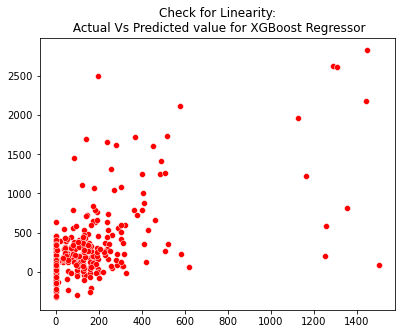

In [59]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,predictions,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value for XGBoost Regressor')

## Neural Network

In [4]:
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "99"

In [5]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10080196896601470387
 xla_global_id: -1]

In [6]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import itertools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib

from sklearn.model_selection import train_test_split

In [65]:
df=pd.read_excel('HW3.xlsx')
### Identifying outliers from isolation Forest
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(df)
y_noano = clf.predict(df)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

df = df.iloc[y_noano[y_noano['Top'] == 1].index.values]
df.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", df.shape[0])

Number of Outliers: 109
Number of rows without outliers: 1891


In [66]:
#create a dataframe with training data columns last_update_days_ago & first_update_days_ago
y=df['Spending'].values
X = df.drop(columns=['sequence_number','Purchase','Spending'])
#check that the target variable has been removed
display(X.head())
X.shape

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_u,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,2900,2900,1,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,3883,3914,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,829,829,0,1,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,869,869,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1995,2002,0,0,1


(1891, 22)

In [67]:
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [68]:
print(X_train.shape)
print(X_test.shape)

(1512, 22)
(379, 22)


In [69]:
col_train = list(X_train.columns)

mat_train = np.matrix(X_train)
mat_test  = np.matrix(X_test)
mat_new = mat_train
mat_y = np.array(y_train).reshape((1512,1))

prepro_y = MinMaxScaler()
prepro_y.fit(mat_y)

prepro = MinMaxScaler()
prepro.fit(mat_train)

prepro_test = MinMaxScaler()
prepro_test.fit(mat_test)

train = pd.DataFrame(prepro.transform(mat_train),columns = col_train)
test  = pd.DataFrame(prepro_test.transform(mat_test),columns = col_train)

train.head()

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_u,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.142857,0.397659,0.397659,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.812037,0.812037,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.142857,0.687127,0.692381,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.142857,0.770958,0.770958,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.894674,0.894674,0.0,0.0,0.0


In [70]:
# List of features
COLUMNS = df.columns
FEATURES = train.columns
LABEL = "Spending"

# Columns
feature_cols = FEATURES

# Training set and Prediction set with the features to predict
training_set = train[FEATURES]

# Train and Test 
y_train = pd.DataFrame(y_train, columns = [LABEL])
training_set = pd.DataFrame(train, columns = FEATURES).merge(y_train, left_index = True, right_index = True)
training_set.head()

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Spending
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.142857,0.397659,0.397659,0.0,0.0,0.0,164.75
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.812037,0.812037,0.0,1.0,0.0,0.00
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.142857,0.687127,0.692381,0.0,0.0,0.0,0.07
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.142857,0.770958,0.770958,0.0,0.0,0.0,135.95
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.894674,0.894674,0.0,0.0,0.0,0.00


In [71]:
# Same thing but for the test set
y_test = pd.DataFrame(y_test, columns = [LABEL])
testing_set = pd.DataFrame(test, columns = FEATURES).merge(y_test, left_index = True, right_index = True)
testing_set.head()

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Spending
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.142857,0.713903,0.708555,0.0,1.0,0.0,0.07
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.142857,0.777210,0.771387,0.0,0.0,0.0,0.07
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.142857,0.535427,0.531416,0.0,0.0,0.0,54.46
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.142857,0.655953,0.651039,0.0,1.0,0.0,0.00
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.142857,0.962990,0.955776,1.0,1.0,0.0,105.00


In [72]:
## DNN For continuous features
seed = 7
np.random.seed(seed)

# Model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model = Sequential()
model.add(Dense(200, input_dim=22, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
#model.compile(loss='mean_squared_error', optimizer=opt)
model.compile(loss='mean_squared_error', optimizer=opt)

#feature_cols = training_set[FEATURES]
#labels = training_set[LABEL].values

model.fit(np.array(train), np.array(y_train), epochs=100, batch_size=10)

Epoch 1/100
152/152 [==============================] - 1s 2ms/step - loss: 19521.8711
Epoch 2/100
152/152 [==============================] - 0s 2ms/step - loss: 14601.3867
Epoch 3/100
152/152 [==============================] - 0s 2ms/step - loss: 11734.0176
Epoch 4/100
152/152 [==============================] - 0s 2ms/step - loss: 10556.0723
Epoch 5/100
152/152 [==============================] - 0s 2ms/step - loss: 10487.7041
Epoch 6/100
152/152 [==============================] - 0s 2ms/step - loss: 10212.4873
Epoch 7/100
152/152 [==============================] - 0s 2ms/step - loss: 10127.3760
Epoch 8/100
152/152 [==============================] - 0s 2ms/step - loss: 10081.1631
Epoch 9/100
152/152 [==============================] - 0s 2ms/step - loss: 10130.0205
Epoch 10/100
152/152 [==============================] - 0s 2ms/step - loss: 10033.5557
Epoch 11/100
152/152 [==============================] - 0s 2ms/step - loss: 10058.1377
Epoch 12/100
152/152 [==============================

In [73]:
# Evaluation on the test set created by train_test_split
model.evaluate(np.array(train), np.array(y_train))

48/48 [==============================] - 0s 1ms/step - loss: 6290.8564


6290.8564453125

In [74]:
# Predictions
feature_cols_test = testing_set[FEATURES]
labels_test = testing_set[LABEL].values

y = model.predict(np.array(test))
predictions = list(itertools.islice(y, testing_set.shape[0]))

In [75]:
### Actuals vs Predicted
predictions = prepro_y.inverse_transform(np.array(predictions).reshape(379,1))
reality = pd.DataFrame(prepro_y.inverse_transform(testing_set), columns = testing_set.columns).Spending

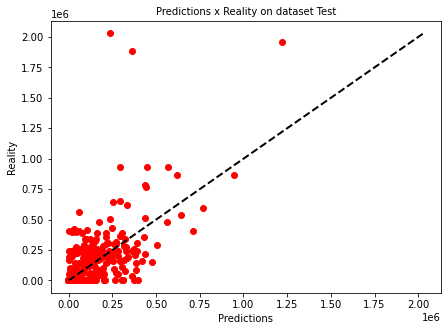

In [76]:
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 

fig, ax = plt.subplots(figsize=(7, 5))

plt.style.use('default')
plt.plot(predictions, reality, 'ro')
plt.xlabel('Predictions', fontsize = 10)
plt.ylabel('Reality', fontsize = 10)
plt.title('Predictions x Reality on dataset Test', fontsize = 10)
ax.plot([reality.min(), reality.max()], [reality.min(), reality.max()], 'k--', lw=2)
plt.show()

In [77]:
preds_y = model.predict(np.array(test))
y_predict = list(itertools.islice(preds_y, test.shape[0]))
y_predict = pd.DataFrame(np.array(y_predict).reshape(len(y_predict),1), columns = ['Spending'])
y_predict['Spending'].max()

814.1672973632812

In [78]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 63.72742527307495
Mean Squared Error: 15130.166103911453
Root Mean Squared Error: 123.00474016846445


Text(0.5, 1.0, 'Check for Linearity:\n Actual Vs Predicted value for Neural Network Regressor')

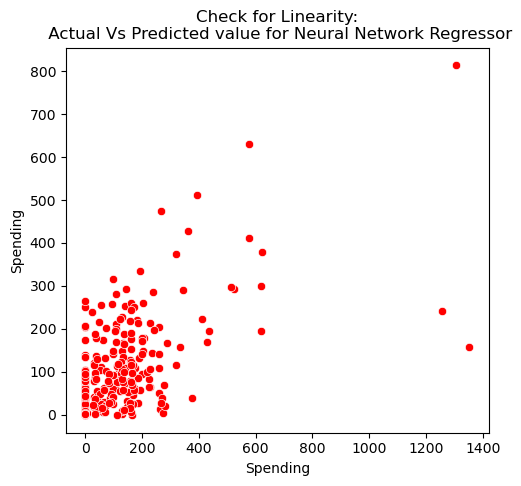

In [79]:
# Check for Linearity
f = plt.figure(figsize=(12,5))
plt.style.use('default')
ax = f.add_subplot(121)
sns.scatterplot(y_test['Spending'],y_predict['Spending'],ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value for Neural Network Regressor')

##### Q1. Part 2
##### As a variation on this exercise, create a separate “restricted” dataset (i.e., a subset of the original dataset), 
##### which includes only purchase records (i.e., where Purchase = 1). Build numeric prediction models to predict Spending
##### for this restricted dataset. All the same requirements as for task (a) apply.

In [80]:
df=pd.read_excel('HW3.xlsx')
df.head()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,127.87
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0.00
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127.48
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0.00
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0.00


In [81]:
### Filtering or only spendings where purchase =1
df_p1=df[df['Purchase']==1]
print(df_p1.shape)
df_p1.head()

(1000, 25)


,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,127.87
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127.48
8,9,1,1,0,0,0,0,0,0,0,...,0,0,4,525,2914,1,1,0,1,488.50
9,10,1,1,0,0,0,0,0,0,0,...,0,0,1,3215,3215,0,0,0,1,173.50
13,14,1,1,0,0,0,0,0,0,0,...,0,0,5,2081,2438,0,1,0,1,1416.00


### Initial EDA

#### Checking distributions

Text(0.5, 1.0, 'Distribution of 1st_update_days_ago')

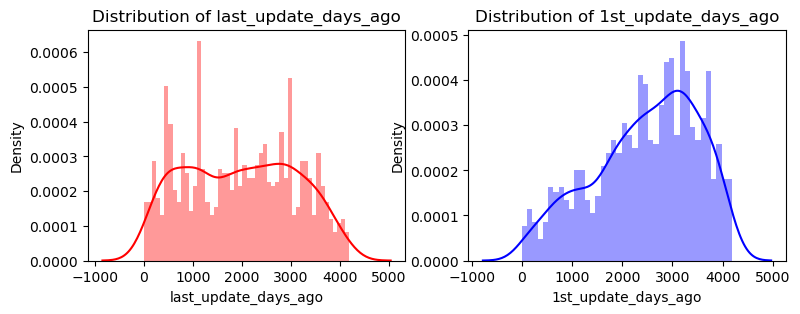

In [82]:
f= plt.figure(figsize=(9,3))

ax=f.add_subplot(121)
sns.distplot(df_p1['last_update_days_ago'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of last_update_days_ago')

ax=f.add_subplot(122)
sns.distplot(df_p1['1st_update_days_ago'],bins=40,color='b',ax=ax)
ax.set_title('Distribution of 1st_update_days_ago')

Text(0.5, 1.0, 'Distribution of Freq')

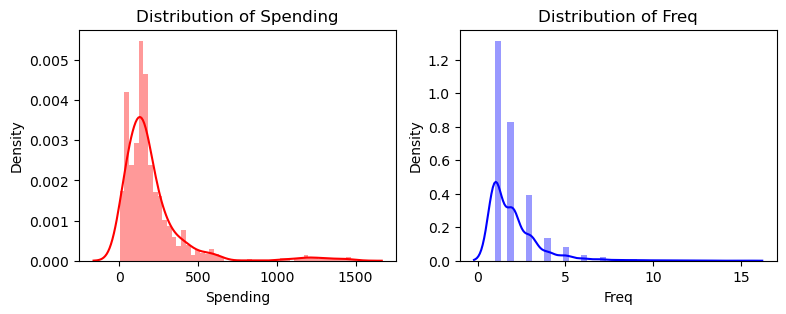

In [83]:
f= plt.figure(figsize=(9,3))

ax=f.add_subplot(121)
sns.distplot(df_p1['Spending'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of Spending')

ax=f.add_subplot(122)
sns.distplot(df_p1['Freq'],bins=40,color='b',ax=ax)
ax.set_title('Distribution of Freq')

In [84]:
### The distributions are more even and smoothened with purchase flag =1 

### Box Plot with Frequency & Spending

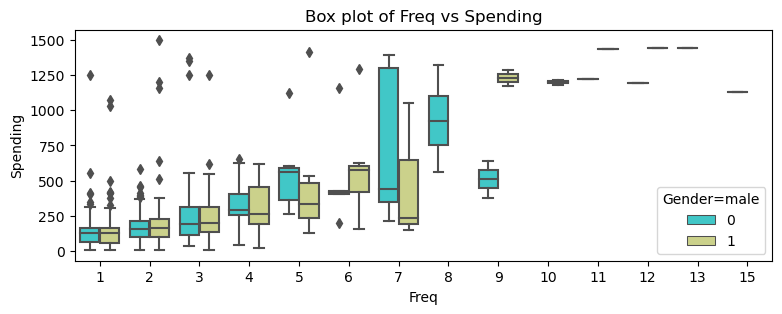

In [85]:
plt.figure(figsize=(9,3))
sns.boxplot(x='Freq', y='Spending',hue='Gender=male',data=df_p1,palette='rainbow')
plt.title('Box plot of Freq vs Spending');

### most purchases are made by females in the frequency number of 7 and 8. Men also show similar pattern
### but numbers are considerably lower than men

### Scatter plots to compare Spendings with First and last days of purchase across both genders

Text(0.5, 1.0, 'Scatter plot of 1st_update_days_ago vs Spending')

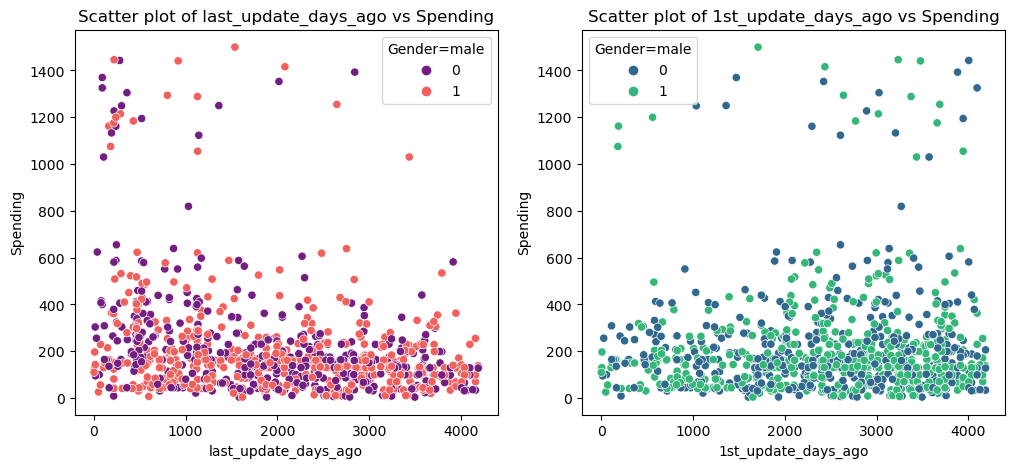

In [86]:
f = plt.figure(figsize=(12,5))
ax = f.add_subplot(121)
sns.scatterplot(x='last_update_days_ago',y='Spending',data=df_p1,palette='magma',hue='Gender=male',ax=ax)
ax.set_title('Scatter plot of last_update_days_ago vs Spending')

ax = f.add_subplot(122)
sns.scatterplot(x='1st_update_days_ago',y='Spending',data=df_p1,palette='viridis',hue='Gender=male')
ax.set_title('Scatter plot of 1st_update_days_ago vs Spending')

#### Identification & removal of outliers

In [87]:
### Identifying outliers from isolation Forest
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(df_p1)
y_noano = clf.predict(df_p1)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

df_p1 = df_p1.iloc[y_noano[y_noano['Top'] == 1].index.values]
df_p1.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", df_p1.shape[0])

Number of Outliers: 50
Number of rows without outliers: 950


### Scaling for Regularization

In [88]:
#create a dataframe with training data columns last_update_days_ago & first_update_days_ago
y=df_p1['Spending'].values
X = df_p1.drop(columns=['sequence_number','Purchase','Spending'])
#check that the target variable has been removed
display(X.head())

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_u,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,2,3662,3662,1,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,3883,3914,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,4,525,2914,1,1,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,3215,3215,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,2,1879,1914,1,1,1


In [89]:
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

### Scaling the dataset
scaler = MinMaxScaler()
# transform data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
print(X_train_scaled.shape, X_test_scaled.shape)

(760, 22) (190, 22)


# Running Models

## Comparison between models

In [90]:
# hold different regression models in a single dictionary
models = {}
models["Linear"]        = LinearRegression()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["RandomForest"]  = RandomForestRegressor()
models["XGBoostRegressor"] = XGBRegressor()
models['LightGBMRegressor'] = ltb.LGBMRegressor()

# 10-fold cross validation for each model
model_results = []
model_names   = []
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, random_state=seed, shuffle = True)
    results = cross_val_score(model, X_train_scaled, y_train, cv=k_fold, scoring=metric)
    
    model_results.append(results)
    model_names.append(model_name)
    print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))

Linear: -20162.904, 6502.173
KNN: -26908.728, 9668.848
DecisionTree: -39308.306, 4211.377
SVR: -28887.453, 10094.612
RandomForest: -21934.013, 3722.056
XGBoostRegressor: -25234.544, 2361.352
LightGBMRegressor: -22050.716, 5958.876


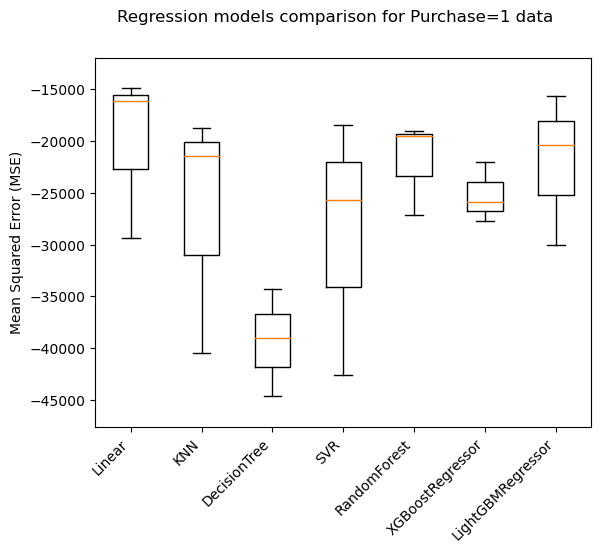

In [91]:
# box-whisker plot to compare regression models
figure = plt.figure()
figure.suptitle('Regression models comparison for Purchase=1 data')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Mean Squared Error (MSE)")
plt.margins(0.05, 0.1)

### LInear Regression

In [92]:
## Fitting a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled,y_train)
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
US,-27.755762
source_a,42.213596
source_c,-14.940942
source_b,14.573189
source_d,24.391666
...,...
last_update_days_ago,-68.802640
1st_update_days_ago,24.152702
Web order,0.837562
Gender=male,-10.423866


#### Generating Predictions

In [93]:
y_pred = lin_reg.predict(X_test_scaled)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(10)

,Actual,Predicted
0,343.50,221.455310
1,43.50,83.107014
2,144.50,71.204638
3,159.50,198.376580
4,160.50,159.385957
5,127.90,102.736549
6,506.00,171.489919
7,197.06,186.871167
8,233.45,126.100594
9,139.50,127.178294


#### Generating evaluation metrics

In [94]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R_square_Sk=lin_reg.score(X_test_scaled, y_test)
print('R square obtain for Linear Regression is :',R_square_Sk)

Mean Absolute Error: 87.32805871570395
Mean Squared Error: 25390.186104001477
Root Mean Squared Error: 159.3429826004317
R square obtain for Linear Regression is : 0.1837090392235614


Text(0.5, 1.0, 'Check for Linearity:\n Actual Vs Predicted value for Linear Regressor')

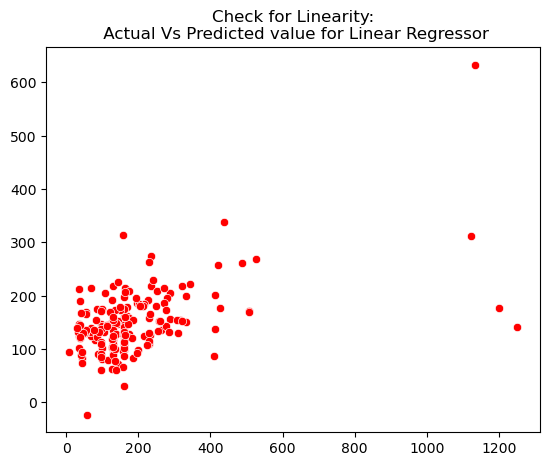

In [95]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value for Linear Regressor')

### KNN Regressor

In [96]:
### Initializing grid for identifying best paramters
grid_params_knn= {'n_neighbors':range(3,20),
                  'weights':['uniform','distance'],
                  'metric':['euclidean','manhattan','minkowski']}
# KNN Classifier
model = KNeighborsRegressor()
NUM_TRIALS= 10
# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)
metric  = "neg_mean_squared_error"
folds=3

# Loop for each trial
for i in range(NUM_TRIALS):

    inner_cv = KFold(n_splits=folds, random_state=i, shuffle = True)
    outer_cv = KFold(n_splits=folds, random_state=i, shuffle = True)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=model, param_grid=grid_params_knn, cv=inner_cv, scoring=metric)
    clf.fit(X_train_scaled, y_train)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X_train_scaled, y=y_train, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

In [97]:
### Model performance
score_difference = non_nested_scores - nested_scores
print(clf.best_params_)
print("Average non_nested_scores {0:6f} and average nested_scores {1:6f}."
      .format(non_nested_scores.mean(), nested_scores.mean()))
print("Average difference of {0:6f} with std. dev. of {1:6f}."
      .format(score_difference.mean(), score_difference.std()))

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}
Average non_nested_scores -25321.465213 and average nested_scores -26135.345489.
Average difference of 813.880276 with std. dev. of 351.678111.


In [98]:
### Training the model based on hyperparameter tuning by grid search
reg_knn = KNeighborsRegressor(metric=clf.best_params_['metric'], 
              n_neighbors= clf.best_params_['n_neighbors'], 
              weights=clf.best_params_['weights'])
### using standardized data because using regularization
reg_knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=19)

In [99]:
## checking the predictions
y_pred_knn = reg_knn.predict(X_test_scaled)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})
df.head(10)

,Actual,Predicted
0,343.50,159.423684
1,43.50,167.503158
2,144.50,145.218947
3,159.50,199.101579
4,160.50,132.947368
5,127.90,126.597895
6,506.00,158.856842
7,197.06,222.790000
8,233.45,208.623684
9,139.50,129.740526


In [100]:
## Generating evaluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_knn))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_knn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))
R_square_knn=reg_knn.score(X_test_scaled, y_test)
print('R square obtained for KNN regressor is :',R_square_knn)

Mean Absolute Error: 88.88283379501384
Mean Squared Error: 29191.813950778534
Root Mean Squared Error: 170.8561206125743
R square obtained for KNN regressor is : 0.061487231362490236


Text(0.5, 1.0, 'Check for Linearity:\n Actual Vs Predicted value for KNN Regressor')

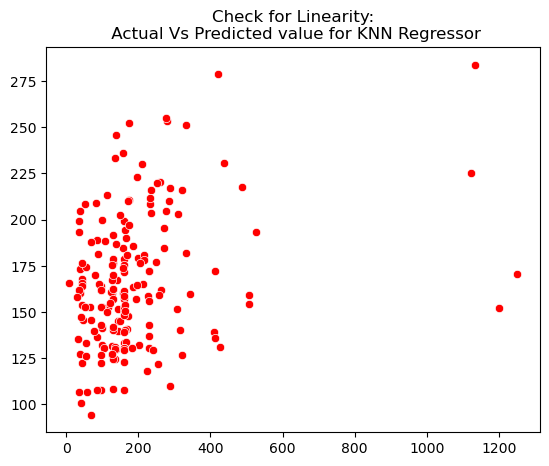

In [101]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_knn,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value for KNN Regressor')

### Decision Tree Regressor

In [102]:
### Initializing grid for identifying best paramters
grid_params_dt= {'max_depth':range(2,5), 
                  'min_samples_leaf':range(1,5),
                  'min_samples_split':range(1,10)}
# KNN Classifier
model = DecisionTreeRegressor()
NUM_TRIALS= 10
# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)
metric  = "neg_mean_squared_error"
folds=3

# Loop for each trial
for i in range(NUM_TRIALS):

    inner_cv = KFold(n_splits=folds, random_state=i, shuffle = True)
    outer_cv = KFold(n_splits=folds, random_state=i, shuffle = True)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=model, param_grid=grid_params_dt, cv=inner_cv, scoring=metric)
    clf.fit(X_train_scaled, y_train)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X_train_scaled, y=y_train, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

In [103]:
### Model performance
score_difference = non_nested_scores - nested_scores
print(clf.best_params_)
print("Average non_nested_scores {0:6f} and average nested_scores {1:6f}."
      .format(non_nested_scores.mean(), nested_scores.mean()))
print("Average difference of {0:6f} with std. dev. of {1:6f}."
      .format(score_difference.mean(), score_difference.std()))

{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 7}
Average non_nested_scores -22019.905872 and average nested_scores -24942.686433.
Average difference of 2922.780561 with std. dev. of 2014.787086.


In [104]:
### Training the model based on hyperparameter tuning by grid search
reg_dt = DecisionTreeRegressor(max_depth=clf.best_params_['max_depth'], 
              min_samples_leaf= clf.best_params_['min_samples_leaf'], 
              min_samples_split=clf.best_params_['min_samples_split'])
### using standardized data because using regularization
reg_dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=2, min_samples_leaf=2, min_samples_split=7)

In [105]:
## Generating predictions
y_pred_dt = reg_dt.predict(X_test_scaled)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dt})
df.head(10)

,Actual,Predicted
0,343.50,169.398514
1,43.50,124.849108
2,144.50,124.849108
3,159.50,169.398514
4,160.50,124.849108
5,127.90,124.849108
6,506.00,169.398514
7,197.06,169.398514
8,233.45,124.849108
9,139.50,124.849108


In [106]:
## Generating evaluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_dt))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_dt))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)))
R_square_dt=reg_dt.score(X_test_scaled, y_test)
print('R square obtained for Decision Tree regressor is :',R_square_dt)

Mean Absolute Error: 89.33198058832825
Mean Squared Error: 27549.072701767607
Root Mean Squared Error: 165.9791333323789
R square obtained for Decision Tree regressor is : 0.11430113461508928


Text(0.5, 1.0, 'Check for Linearity:\n Actual Vs Predicted value for Decision Tree Regressor')

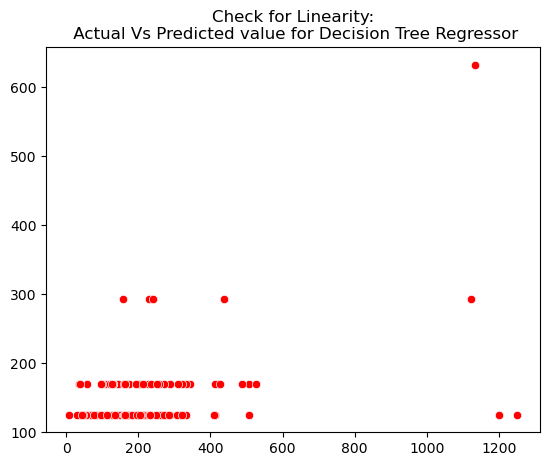

In [107]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_dt,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value for Decision Tree Regressor')

### SVR

In [108]:
# Set up possible values of parameters to optimize over
p_grid = [{'kernel': ['rbf','poly'], 
           'gamma': [1e-3, 0.5, 1, 10],
           'C': [0.01, 0.1, 1]}]
# Support Vector Classifier
model = SVR()
NUM_TRIALS= 5
# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)
folds=3
metric  = "neg_mean_squared_error"

# Loop for each trial
for i in range(NUM_TRIALS):

    inner_cv = KFold(n_splits=folds, random_state=i, shuffle = True)
    outer_cv = KFold(n_splits=folds, random_state=i, shuffle = True)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=model, param_grid=p_grid, cv=inner_cv, scoring=metric)
    clf.fit(X_train_scaled, y_train)
    
    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X_train_scaled, y=y_train, cv=outer_cv)
    nested_scores[i] = nested_score.mean()
    print(i)

0
1
2
3
4


In [109]:
### Model performance
print(clf.best_params_)
print("Average nested_scores {0:6f}.".format(nested_scores.mean()))

{'C': 0.01, 'gamma': 10, 'kernel': 'poly'}
Average nested_scores -21062.948314.


In [110]:
### Training the model based on hyperparameter tuning by grid search
reg_svm = SVR(C=clf.best_params_['C'],
              gamma= clf.best_params_['gamma'],
              kernel= clf.best_params_['kernel'],)
### using standardized data because using regularization
reg_svm.fit(X_train_scaled, y_train)

SVR(C=0.01, gamma=10, kernel='poly')

In [111]:
### Fitting the model on the test data
y_test_svr=reg_svm.predict(X_test_scaled) 

In [112]:
### Generating predictions
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_svr})
df.head(10)

,Actual,Predicted
0,343.50,218.306700
1,43.50,152.043905
2,144.50,128.658131
3,159.50,174.330047
4,160.50,168.149203
5,127.90,96.327552
6,506.00,151.579053
7,197.06,230.915172
8,233.45,157.120431
9,139.50,109.346059


In [113]:
### Evaluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_svr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_svr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_svr)))
R_square_svr=reg_svm.score(X_test_scaled, y_test)
print('R square obtained for support vector regressor is :',R_square_svr)

Mean Absolute Error: 93.79506610358762
Mean Squared Error: 27891.60674252264
Root Mean Squared Error: 167.00780443596832
R square obtained for support vector regressor is : 0.10328871272573192


Text(0.5, 1.0, 'Check for Linearity:\n Actual Vs Predicted value for Support Vector Regressor')

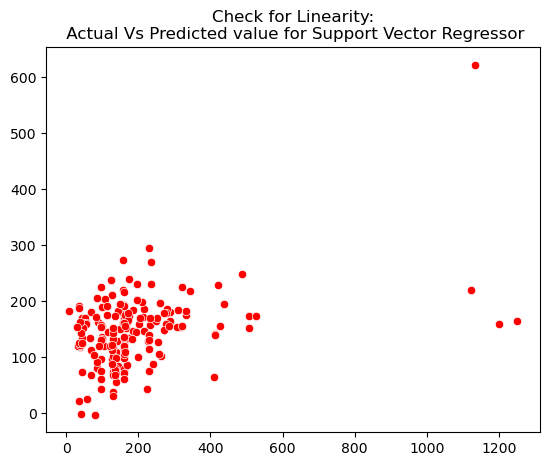

In [114]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_test_svr,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value for Support Vector Regressor')

### XGBoost Regressor

In [115]:
# Reporting util for different optimizers
def report_perf(optimizer, X, y, title="model", callbacks=None):
    """
    A wrapper for measuring time and performances of different optmizers
    
    optimizer = a sklearn or a skopt optimizer
    X = the training set 
    y = our target
    title = a string label for the experiment
    """
    start = time()
    
    if callbacks is not None:
        optimizer.fit(X, y, callback=callbacks)
    else:
        optimizer.fit(X, y)
        
    d=pd.DataFrame(optimizer.cv_results_)
    best_score = optimizer.best_score_
    best_score_std = d.iloc[optimizer.best_index_].std_test_score
    best_params = optimizer.best_params_
    
    print((title + " took %.2f seconds,  candidates checked: %d, best CV score: %.3f "
           + u"\u00B1"+" %.3f") % (time() - start, 
                                   len(optimizer.cv_results_['params']),
                                   best_score,
                                   best_score_std))    
    print('Best parameters:')
    print(best_params)
    print()
    return best_params



# Setting the scoring function
scoring = make_scorer(partial(mean_squared_error, squared=False), 
                      greater_is_better=False)


# Setting the validation strategy
skf = KFold(n_splits=7, random_state=0, shuffle = True)

cv_strategy = list(skf.split(X_train_scaled, y_train))

In [116]:
# Setting the basic regressor
reg = XGBRegressor(random_state=0, booster='gbtree', objective='reg:squarederror', tree_method='gpu_hist')

In [117]:
# Setting the search space
search_spaces = {'learning_rate': Real(0.01, 1.0, 'uniform'),
                 'max_depth': Integer(2, 12),
                 'subsample': Real(0.1, 1.0, 'uniform'),
                 'colsample_bytree': Real(0.1, 1.0, 'uniform'), # subsample ratio of columns by tree
                 'reg_lambda': Real(1e-9, 100., 'uniform'), # L2 regularization
                 'reg_alpha': Real(1e-9, 100., 'uniform'), # L1 regularization
                 'n_estimators': Integer(50, 5000)
   }

In [118]:
# Wrapping everything up into the Bayesian optimizer
opt = BayesSearchCV(estimator=reg,                                    
                    search_spaces=search_spaces,                      
                    scoring=scoring,                                  
                    cv=cv_strategy,                                           
                    n_iter=120,                                       # max number of trials
                    n_points=1,                                       # number of hyperparameter sets evaluated at the same time
                    n_jobs=1,                                         # number of jobs
                    iid=False,                                        # if not iid it optimizes on the cv score
                    return_train_score=False,                         
                    refit=False,                                      
                    optimizer_kwargs={'base_estimator': 'GP'},        # optmizer parameters: we use Gaussian Process (GP)
                    random_state=0)                                   # random state for replicability

In [119]:
# Running the optimizer
overdone_control = DeltaYStopper(delta=0.0001)               # We stop if the gain of the optimization becomes too small
time_limit_control = DeadlineStopper(total_time=60)          # We impose a time limit 

best_params = report_perf(opt, X_train_scaled, y_train,'XGBoost_regression', 
                          callbacks=[overdone_control, time_limit_control])

XGBoost_regression took 117.64 seconds,  candidates checked: 1, best CV score: -153.630 ± 26.709
Best parameters:
OrderedDict([('colsample_bytree', 0.5778677484569327), ('learning_rate', 0.6793187137881445), ('max_depth', 8), ('n_estimators', 3251), ('reg_alpha', 85.87438316565517), ('reg_lambda', 98.05562626781331), ('subsample', 0.21526179068277768)])



In [120]:
# Transferring the best parameters to our basic regressor
reg = XGBRegressor(random_state=0, booster='gbtree', objective='reg:squarederror', tree_method='gpu_hist', **best_params)

In [121]:
# Cross-validation prediction
skf = KFold(n_splits=7, random_state=0, shuffle = True)

predictions = np.zeros(len(X_test_scaled))
rmse = list()

for k, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, y_train)):
    reg.fit(X_train_scaled, y_train)
    val_preds = reg.predict(X_train_scaled)
    val_rmse = mean_squared_error(y_true=y_train, y_pred=val_preds, squared=False)
    print(f"Fold {k} RMSE: {val_rmse:0.5f}")
    rmse.append(val_rmse)
    predictions += reg.predict(X_test_scaled).ravel()
    
predictions /= folds
print(f"repeated CV RMSE: {np.mean(rmse):0.5f} (std={np.std(rmse):0.5f})")

Fold 0 RMSE: 30.05672
Fold 1 RMSE: 30.05672
Fold 2 RMSE: 30.05672
Fold 3 RMSE: 30.05672
Fold 4 RMSE: 30.05672
Fold 5 RMSE: 30.05672
Fold 6 RMSE: 30.05672
repeated CV RMSE: 30.05672 (std=0.00000)


In [122]:
## Actuals & Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df.head(10)

,Actual,Predicted
0,343.50,-234.327268
1,43.50,73.393318
2,144.50,379.436651
3,159.50,406.106099
4,160.50,420.299072
5,127.90,240.820536
6,506.00,416.391088
7,197.06,413.106776
8,233.45,307.833338
9,139.50,177.250697


In [123]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
R_square_xgb=reg.score(X_test_scaled, y_test)
print('R square obtained for Bayesian optimised XGBoost regressor is :',R_square_xgb)

Mean Absolute Error: 250.93263059949038
Mean Squared Error: 105157.40004286947
Root Mean Squared Error: 324.27981750776513
R square obtained for Bayesian optimised XGBoost regressor is : -0.13035979657764285


Text(0.5, 1.0, 'Check for Linearity:\n Actual Vs Predicted value for XGBoost Regressor')

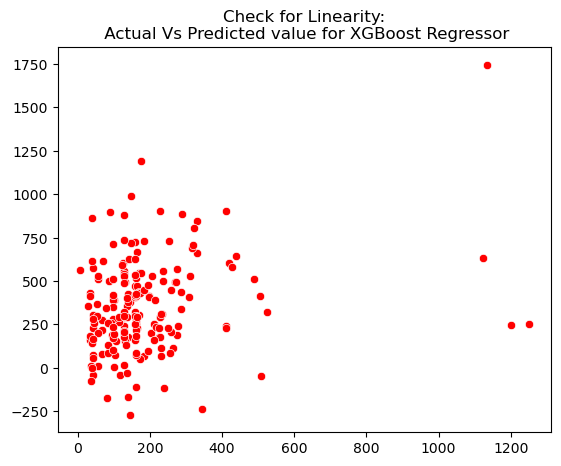

In [124]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,predictions,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value for XGBoost Regressor')

## Neural Network

In [125]:
#create a dataframe with training data columns last_update_days_ago & first_update_days_ago
y=df_p1['Spending'].values
X = df_p1.drop(columns=['sequence_number','Purchase','Spending'])
#check that the target variable has been removed
display(X.head())
X.shape

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

print(X_train.shape)
print(X_test.shape)

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_u,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,2,3662,3662,1,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,3883,3914,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,4,525,2914,1,1,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,3215,3215,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,2,1879,1914,1,1,1


(760, 22)
(190, 22)


In [126]:
## Preprocessing
col_train = list(X_train.columns)

mat_train = np.matrix(X_train)
mat_test  = np.matrix(X_test)
mat_new = mat_train
mat_y = np.array(y_train).reshape((760,1))

prepro_y = MinMaxScaler()
prepro_y.fit(mat_y)

prepro = MinMaxScaler()
prepro.fit(mat_train)

prepro_test = MinMaxScaler()
prepro_test.fit(mat_test)

train = pd.DataFrame(prepro.transform(mat_train),columns = col_train)
test  = pd.DataFrame(prepro_test.transform(mat_test),columns = col_train)

train.head()

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_u,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.166667,0.410731,0.429663,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.000000,0.389317,0.386434,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.000000,0.963426,0.956293,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.166667,0.181906,0.203965,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.166667,0.491578,0.496776,1.0,1.0,1.0


In [127]:
# List of features
COLUMNS = df.columns
FEATURES = train.columns
LABEL = "Spending"

# Columns
feature_cols = FEATURES

# Training set and Prediction set with the features to predict
training_set = train[FEATURES]

# Train and Test 
y_train = pd.DataFrame(y_train, columns = [LABEL])
training_set = pd.DataFrame(train, columns = FEATURES).merge(y_train, left_index = True, right_index = True)
training_set.head()

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Spending
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.166667,0.410731,0.429663,1.0,1.0,0.0,122.45
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.389317,0.386434,1.0,0.0,0.0,20.00
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000000,0.963426,0.956293,1.0,0.0,0.0,43.00
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.166667,0.181906,0.203965,0.0,1.0,0.0,163.00
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.166667,0.491578,0.496776,1.0,1.0,1.0,135.56


In [128]:
# Same thing but for the test set
y_test = pd.DataFrame(y_test, columns = [LABEL])
testing_set = pd.DataFrame(test, columns = FEATURES).merge(y_test, left_index = True, right_index = True)
testing_set.head()

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Spending
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.142857,0.373056,0.700168,1.0,0.0,0.0,343.5
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.299593,0.299593,1.0,1.0,0.0,43.5
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.566164,0.566164,1.0,1.0,0.0,144.5
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.142857,0.699928,0.710457,0.0,0.0,0.0,159.5
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.071429,0.613065,0.614980,1.0,1.0,0.0,160.5


In [129]:
## DNN For continuous features
seed = 7
np.random.seed(seed)

# Model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model = Sequential()
model.add(Dense(200, input_dim=22, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
#model.compile(loss='mean_squared_error', optimizer=opt)
model.compile(loss='mean_squared_error', optimizer=opt)

#feature_cols = training_set[FEATURES]
#labels = training_set[LABEL].values

model.fit(np.array(train), np.array(y_train), epochs=100, batch_size=10)

Epoch 1/100
76/76 [==============================] - 1s 2ms/step - loss: 54938.4727
Epoch 2/100
76/76 [==============================] - 0s 1ms/step - loss: 28295.9414
Epoch 3/100
76/76 [==============================] - 0s 1ms/step - loss: 26637.7109
Epoch 4/100
76/76 [==============================] - 0s 1ms/step - loss: 24663.0137
Epoch 5/100
76/76 [==============================] - 0s 1ms/step - loss: 22611.8770
Epoch 6/100
76/76 [==============================] - 0s 1ms/step - loss: 20306.3535
Epoch 7/100
76/76 [==============================] - 0s 1ms/step - loss: 19154.0137
Epoch 8/100
76/76 [==============================] - 0s 1ms/step - loss: 18470.4316
Epoch 9/100
76/76 [==============================] - 0s 1ms/step - loss: 18200.9492
Epoch 10/100
76/76 [==============================] - 0s 1ms/step - loss: 18049.2324
Epoch 11/100
76/76 [==============================] - 0s 1ms/step - loss: 18139.1914
Epoch 12/100
76/76 [==============================] - 0s 1ms/step - loss: 

In [130]:
# Evaluation on the test set created by train_test_split
model.evaluate(np.array(train), np.array(y_train))

24/24 [==============================] - 0s 1ms/step - loss: 14058.4932


14058.4931640625

In [131]:
# Predictions
feature_cols_test = testing_set[FEATURES]
labels_test = testing_set[LABEL].values
y = model.predict(np.array(test))
predictions = list(itertools.islice(y, testing_set.shape[0]))

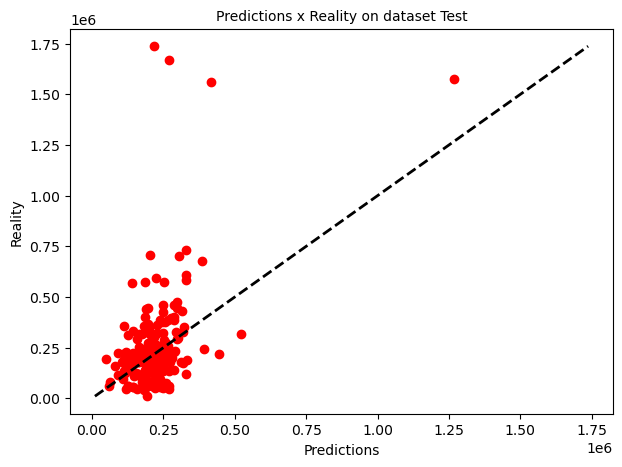

In [132]:
### Actuals vs Predicted
predictions = prepro_y.inverse_transform(np.array(predictions).reshape(190,1))
reality = pd.DataFrame(prepro_y.inverse_transform(testing_set), columns = testing_set.columns).Spending

matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 

fig, ax = plt.subplots(figsize=(7, 5))

plt.plot(predictions, reality, 'ro')
plt.xlabel('Predictions', fontsize = 10)
plt.ylabel('Reality', fontsize = 10)
plt.title('Predictions x Reality on dataset Test', fontsize = 10)
ax.plot([reality.min(), reality.max()], [reality.min(), reality.max()], 'k--', lw=2)
plt.show()

In [133]:
## Generating Evaluation metrics
preds_y = model.predict(np.array(test))
y_predict = list(itertools.islice(preds_y, test.shape[0]))
y_predict = pd.DataFrame(np.array(y_predict).reshape(len(y_predict),1), columns = ['Spending'])
y_predict['Spending'].max()


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 88.65043257703279
Mean Squared Error: 24707.63137805494
Root Mean Squared Error: 157.18661322789208


Text(0.5, 1.0, 'Check for Linearity:\n Actual Vs Predicted value for Neural Network Regressor')

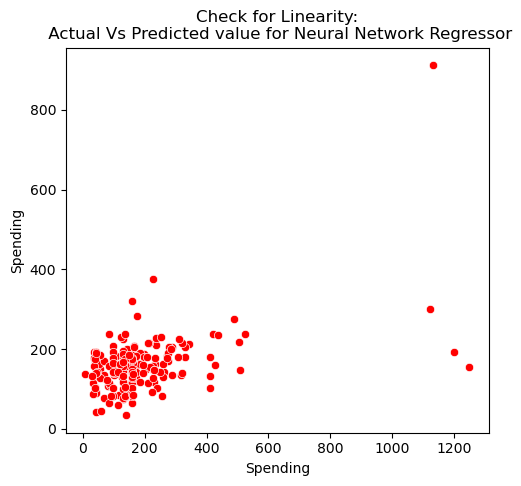

In [134]:
# Check for Linearity
f = plt.figure(figsize=(12,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test['Spending'],y_predict['Spending'],ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value for Neural Network Regressor')

##### Part c
##### For each predictive modeling technique, discuss the predictive performance differences between the models built for task (a) vs. ##### task (b): which models exhibit better predictive performance? Why do you think that is

## Model Comparison

Model comparison for both (a) and (b) has been done in the above box plots.
The ensemble models perform better than other models.
But Neural network performs the best in both cases.

But, RMSE was lesser for (a) compared to (b) for neural network.
This is happening becuase when all purchases are 1 then model is overfitting on test data
and is not able to generalize the behaviour that well